# Code for Linear Regression

## Importing Data

In [21]:
import csv, pandas as pd, numpy as np
csvfile = open('aapl.csv', newline='')
workbook = csv.reader(csvfile, delimiter=' ', quotechar='|')
print(workbook)

In [22]:
dates = []
opening_price = []
high_price = []
low_price = []
closing_price = []
volume = []
for row in workbook:
    try:
        array_row = row[0].split(',')
        try:
            float(array_row[1])
            float(array_row[2])
            float(array_row[3])
            float(array_row[4])
            float(array_row[5])
        except:
            print('Invalid Data: ', array_row)
            continue
        dates.append(array_row[0])
        opening_price.append(float(array_row[1]))
        high_price.append(float(array_row[2]))
        low_price.append(float(array_row[3]))
        closing_price.append(float(array_row[4]))
        volume.append(float(array_row[5]))
    except: 
        print(row)

features = {'opening_price':opening_price, 'high_price':high_price, 'low_price':low_price, 'volume':volume}
m = len(dates)
y = {'closing_price' : closing_price}

Invalid Data:  ['\ufeffDate', 'Open', 'High', 'Low', 'Close', 'Volume']


## Get X,Y DataFrames 

In [23]:
df_x = pd.DataFrame(features)
print(df_x[:10])

   high_price  low_price  opening_price      volume
0      167.54     162.88         163.04  40644933.0
1      164.75     161.65         161.95  32549163.0
2      163.89     157.51         158.50  60819539.0
3      157.89     150.24         157.07  70672608.0
4      161.00     155.03         160.29  54390516.0
5      163.40     159.07         163.08  51608580.0
6      163.72     154.00         154.83  68243838.0
7      163.88     156.00         159.10  72738522.0
8      166.80     160.10         166.00  86593825.0
9      168.62     166.76         167.16  47230787.0


In [24]:
df_y = pd.DataFrame(y)
print(df_y[:10])

   closing_price
0         167.37
1         164.34
2         162.71
3         156.41
4         155.15
5         159.54
6         163.03
7         156.49
8         160.50
9         167.78


In [25]:
df_x.describe()

,high_price,low_price,opening_price,volume
count,4000.000000,4000.000000,4000.000000,4.000000e+03
mean,51.318470,50.345553,50.852702,1.261720e+08
std,48.254563,47.536884,47.903902,1.000376e+08
min,0.940000,0.910000,0.930000,9.515800e+06
25%,9.557500,9.227500,9.397500,5.484920e+07
50%,31.415000,30.560000,30.950000,9.834802e+07
75%,89.247500,87.375000,88.412500,1.684245e+08
max,180.100000,178.250000,179.370000,8.432640e+08


In [26]:
df_y.describe()

,closing_price
count,4000.000000
mean,50.846305
std,47.909996
min,0.940000
25%,9.377500
50%,31.290000
75%,88.422500
max,179.260000


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

## Split Training Data and Test Data

In [28]:
reg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2,random_state=4)

In [29]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Coefficients and Linear Regression

In [30]:
reg.coef_

array([[ 8.19691377e-01,  7.76935402e-01, -5.96481472e-01,
         1.18056278e-10]])

In [11]:
y_predicted = reg.predict(x_test)
print(y_predicted[:5])

[[  6.34545474]
 [ 27.1436515 ]
 [174.15497626]
 [ 37.57302691]
 [102.72332804]]


## Plots

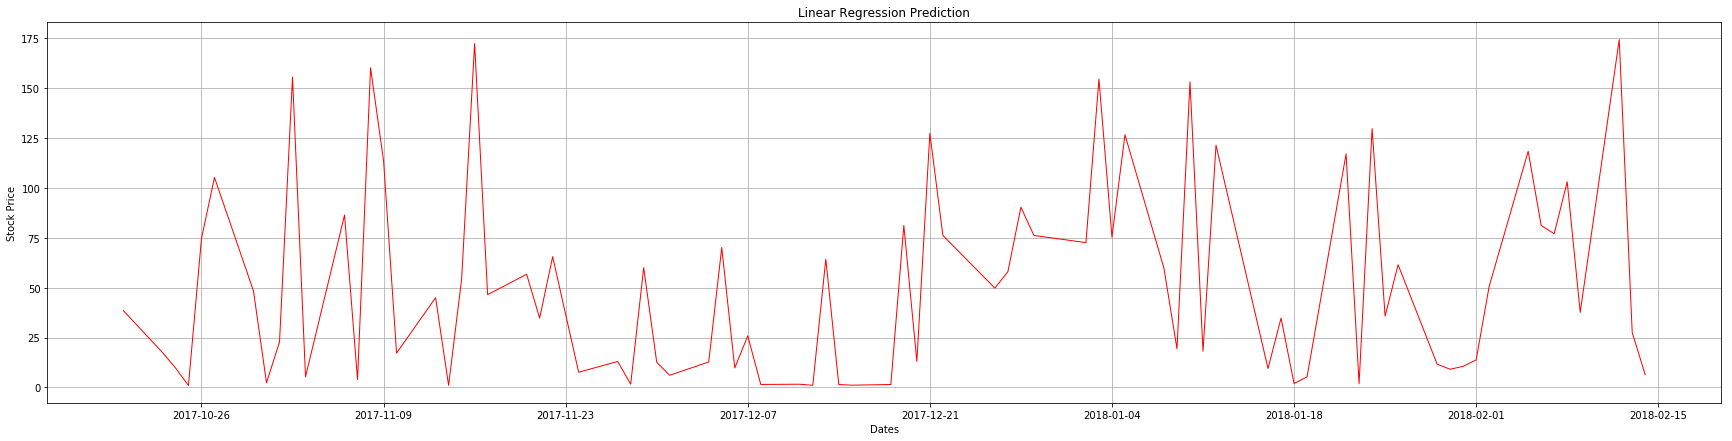

In [32]:
import matplotlib.pyplot as plt
from datetime import date
new_dates = []
for x in dates:
    series = x.split('-')
    if 'Jan' == series[1]:
        series[1] = 1
    elif 'Feb' == series[1]:
        series[1] = 2
    elif 'Mar' == series[1]:
        series[1] = 3
    elif 'Apr' == series[1]:
        series[1] = 4
    elif 'May' == series[1]:
        series[1] = 5
    elif 'Jun' == series[1]:
        series[1] = 6
    elif 'Jul' == series[1]:
        series[1] = 7
    elif 'Aug' == series[1]:
        series[1] = 8
    elif 'Sep' == series[1]:
        series[1] = 9
    elif 'Oct' == series[1]:
        series[1] = 10
    elif 'Nov' == series[1]:
        series[1] = 11
    elif 'Dec' == series[1]:
        series[1] = 12
    else:
        print(series[1], 'Left')
        continue
    try:
        new_dates.append(date(year=int(series[2]) + 2000, month=series[1],day=int(series[0])))
    except:
        print(series)
    
        
plt.figure(figsize=(30,7))
#plt.plot(new_dates[:80:1],y_predicted[:80:1], color='blue', linewidth=1, label='Predicted')
plt.plot(new_dates[:80:1], y_test['closing_price'][:80:1], color='red', linewidth=1, label='Actual')

plt.title('Linear Regression Prediction')
plt.ylabel('Stock Price')
plt.xlabel('Dates')
plt.grid(True)
plt.show()

## Actual Value

In [18]:
for x,y in zip(dates[:5:1], y_test['closing_price'][:5:1]):    
    print('Date: ',x, 'Closing Price: ', y)

Date:  14-Feb-18 Closing Price:  6.36
Date:  13-Feb-18 Closing Price:  27.4
Date:  12-Feb-18 Closing Price:  174.22
Date:  9-Feb-18 Closing Price:  37.56
Date:  8-Feb-18 Closing Price:  103.01


## Predicted Value

In [19]:
for x,y in zip(dates[:5:-1], y_predicted[:5:1]):
    print('Date: ',x, 'Closing Price: ', y[0])

Date:  27-Mar-02 Closing Price:  6.345454738865259
Date:  28-Mar-02 Closing Price:  27.143651504085295
Date:  1-Apr-02 Closing Price:  174.15497626431937
Date:  2-Apr-02 Closing Price:  37.57302691138312
Date:  3-Apr-02 Closing Price:  102.7233280405992
